# Восстановление золота из руды (ML_project_regression)

**Задание:**  <br>
Подготовить прототип модели машинного обучения для «...». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Необходимо использовать данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

**Технологический процесс получения золота из руды** <br>
Когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.

**Наименование признаков** <br>
[этап].[тип_параметра].[название_параметра] <br>
Пример: rougher.input.feed_ag <br>

*Возможные значения для блока [этап]:*

    rougher — флотация
    primary_cleaner — первичная очистка
    secondary_cleaner — вторичная очистка
    final — финальные характеристики
    
*Возможные значения для блока [тип_параметра]:*

    input — параметры сырья
    output — параметры продукта
    state — параметры, характеризующие текущее состояние этапа
    calculation — расчётные характеристики    

**Метрика качества** <br>
Для данного проекта используем метрику качества — sMAPE

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Откройте-файлы-и-изучите-их." data-toc-modified-id="Откройте-файлы-и-изучите-их.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откройте файлы и изучите их.</a></span></li><li><span><a href="#Проверим,-что-эффективность-обогащения-рассчитана-правильно" data-toc-modified-id="Проверим,-что-эффективность-обогащения-рассчитана-правильно-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверим, что эффективность обогащения рассчитана правильно</a></span></li><li><span><a href="#Проанализируйте-признаки,-недоступные-в-тестовой-выборке" data-toc-modified-id="Проанализируйте-признаки,-недоступные-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проанализируйте признаки, недоступные в тестовой выборке</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки" data-toc-modified-id="Посмотрим,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки</a></span></li><li><span><a href="#Сравните-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках." data-toc-modified-id="Сравните-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравните распределения размеров гранул сырья на обучающей и тестовой выборках.</a></span></li><li><span><a href="#Исследуйте-суммарную-концентрацию-всех-веществ-на-разных-стадиях" data-toc-modified-id="Исследуйте-суммарную-концентрацию-всех-веществ-на-разных-стадиях-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуйте суммарную концентрацию всех веществ на разных стадиях</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Создание-функции-для-вычисления--sMAPE" data-toc-modified-id="Создание-функции-для-вычисления--sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создание функции для вычисления  sMAPE</a></span></li><li><span><a href="#Удаление-выбросов-целевого-признака" data-toc-modified-id="Удаление-выбросов-целевого-признака-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Удаление выбросов целевого признака</a></span></li><li><span><a href="#Выделение-целевого-признака" data-toc-modified-id="Выделение-целевого-признака-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Выделение целевого признака</a></span></li><li><span><a href="#Обучение-разных-моделей-и-оценка-их-качества-кросс-валидацией" data-toc-modified-id="Обучение-разных-моделей-и-оценка-их-качества-кросс-валидацией-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Обучение разных моделей и оценка их качества кросс-валидацией</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li></ul></li><li><span><a href="#Проверка-лучшей-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-лучшей-модели-на-тестовой-выборке-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Проверка лучшей модели на тестовой выборке</a></span></li><li><span><a href="#Проверим-модель-на-адекватность" data-toc-modified-id="Проверим-модель-на-адекватность-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Проверим модель на адекватность</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод:</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Подготовка данных

### Изучение исходных данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import RandomState
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [2]:
# импортируем данные
data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
# переведем формат столбцов даты в дату
data_train['date'] =  pd.to_datetime(data_train['date'])
data_test['date'] =  pd.to_datetime(data_test['date'])
data_full['date'] =  pd.to_datetime(data_full['date'])

In [4]:
#проверим есть ли пропуски
data_train.isna().sum().sort_values(ascending=False)

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
                                            ... 
rougher.output.concentrate_pb                  0
rougher.output.concentrate_au                  0
rougher.output.recovery                        0
rougher.output.tail_pb                         0
date                                           0
Length: 87, dtype: int64

Вывод: пропуски есть, их можно заменить ближайшими значениями, так как согласно техзадания: соседние по времени параметры часто похожи.

In [5]:
#метод ffill заполняет вместо пропуска предыдущее по времени значение 
data_train = data_train.fillna(method='ffill') 
data_test = data_test.fillna(method='ffill') 
data_full = data_full.fillna(method='ffill') 
# проверим, что пропусков не осталось. 
display(data_train[
    data_train.isnull().any(1)]) # если есть пропуски, они выведутся
display(data_test[
    data_test.isnull().any(1)])
display(data_full[
    data_full.isnull().any(1)])

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


### Проверим, что эффективность обогащения рассчитана правильно

In [6]:
# Эффективность обогащения рассчитывается по формуле из техзадания
c = data_train['rougher.output.concentrate_au']
f = data_train['rougher.input.feed_au']
t = data_train['rougher.output.tail_au']

data_train['rougher.output.recovery_calculated'] = c * (f - t) /(f * (c-t)) * 100

# Найдем MAE между нашими расчётами и значением признака
mae = mean_absolute_error(data_train['rougher.output.recovery'], 
                          data_train['rougher.output.recovery_calculated'])  
print('MAE между расчетным и значением признака = ', mae)      

# удалим соданный нами столбец, он больше нам не понадобится
data_train = data_train.drop('rougher.output.recovery_calculated', axis = 1)

MAE между расчетным и значением признака =  9.73512347450521e-15


Вывод: MAE имеет низкое значение, приближенное к нулю, что говорит о том, что эффективность обогащения рассчитана правильно

### Проанализируем признаки, недоступные в тестовой выборке

In [7]:
# надем признаки, недоступные в тестовой выборке, но имеющиеся в обучающей
data_test_no_columns = data_train.drop(data_test.columns, axis=1).columns
data_test_no_columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

Вывод: отсутствуют outputs, параметры продукта на выходе. 

In [8]:
# удалим в тренировочной выборке столбцы, недоступные в тестовой выборке
# целевые признаки удалять не будем
#data_test[data_test_no_columns] = data_full[data_full['date'].isin(data_test['date'])][data_test_no_columns]
data_train = data_train.drop(
    data_test_no_columns.drop(['rougher.output.recovery', # целевые признаки оставим
                               'final.output.recovery']),
    axis = 1
)

Вывод: данные подготовлены для дальнейшего анализа.

## Анализ данных

### Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки

<AxesSubplot:>

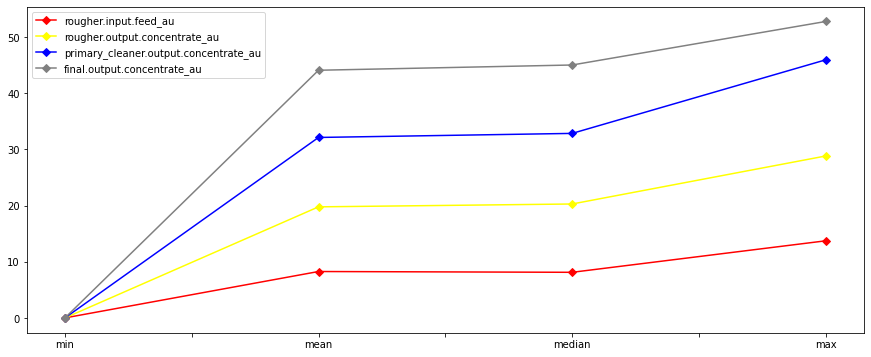

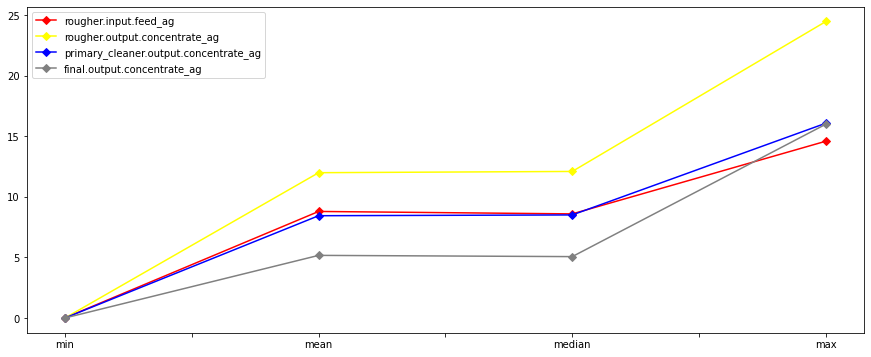

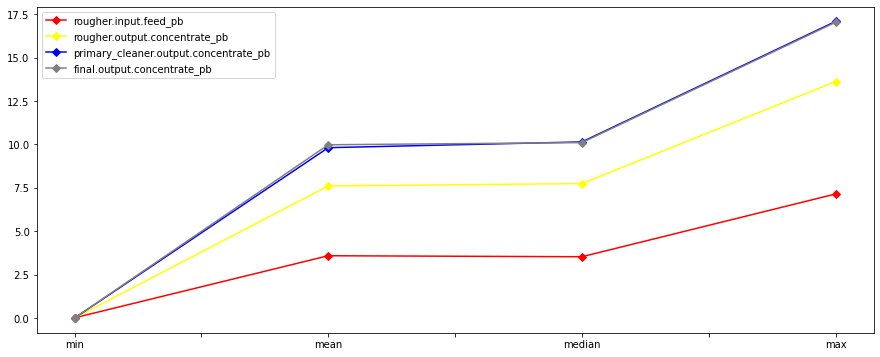

In [9]:
data_full[['rougher.input.feed_au', # перед флотацией
          'rougher.output.concentrate_au', # после флотации
           'primary_cleaner.output.concentrate_au', # перед очисткой
           'final.output.concentrate_au'] # после очистки
         ].agg(['min',
              'mean',
              'median',
              'max']).plot(figsize=(15,6), marker='D', color=['red', 'yellow', 'blue', 'grey'])

data_full[['rougher.input.feed_ag',
          'rougher.output.concentrate_ag',
           'primary_cleaner.output.concentrate_ag',
           'final.output.concentrate_ag']
         ].agg(['min',
              'mean',
              'median',
              'max']).plot(figsize=(15,6), marker='D', color=['red', 'yellow', 'blue', 'grey'])

data_full[['rougher.input.feed_pb',
          'rougher.output.concentrate_pb',
           'primary_cleaner.output.concentrate_pb',
           'final.output.concentrate_pb']
         ].agg(['min',
              'mean',
              'median',
              'max']).plot(figsize=(15,6), marker='D', color=['red', 'yellow', 'blue', 'grey'])



<AxesSubplot:>

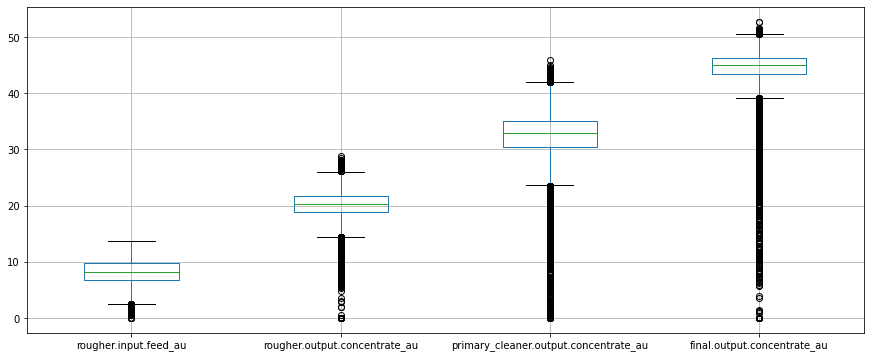

In [10]:
data_full[['rougher.input.feed_au',
          'rougher.output.concentrate_au',
           'primary_cleaner.output.concentrate_au',
           'final.output.concentrate_au']
         ].boxplot(figsize=(15,6))

Вывод: концентрация золота(Au) растет на всех этапах очистки.  <br>
Концентрация серебра(Ag) растет при флотации и падает при очистке.  <br>
Конуентрация Pb растет при флотации и остается неизменной при очистке

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

<AxesSubplot:>

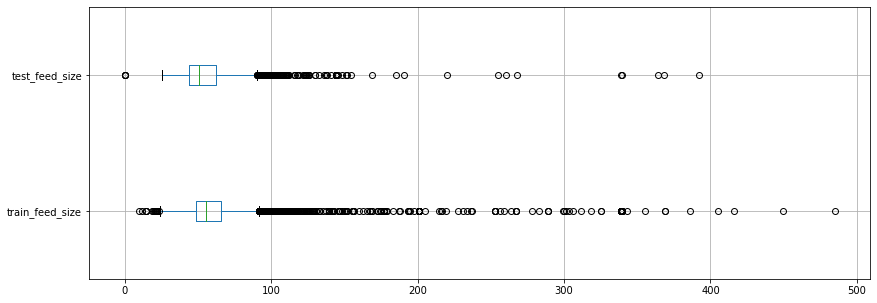

In [11]:
pd.concat([data_train['rougher.input.feed_size']] 
          + [data_test['rougher.input.feed_size']], axis=1, keys=['train_feed_size', 'test_feed_size']
         ).boxplot(figsize=(14,5), vert=False)


Вывод: распределение гранул сырья для тренировочной и тестовой выборки примерно одинаковое. Несмотря на то, что больше выбросов и их размах на тренировочной выборке, значения в перделах диаргаммы размаха идентичны.

### Исследуем суммарную концентрацию всех веществ на разных стадиях

(0.0, 700.0)

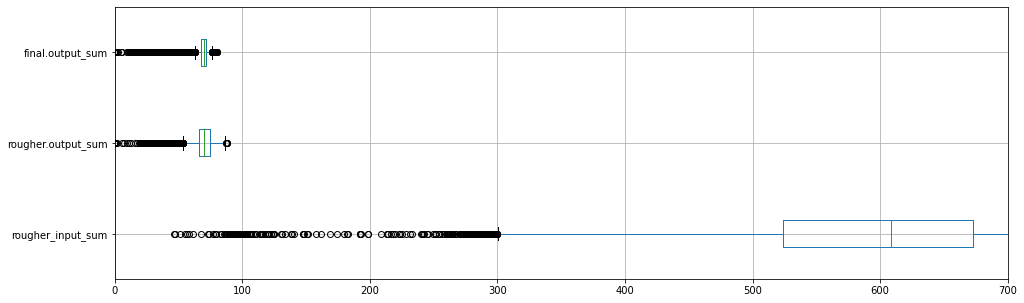

In [12]:
# посчитаем суммарную концентрацию всех веществ и построим их распредление на разных стадиях
pd.concat(
    [data_full.filter(regex='rougher.input.feed_').sum(axis=1)]
    + [data_full.filter(regex='rougher.output.concentrate_').sum(axis=1)]
    + [data_full.filter(regex='final.output.concentrate_').sum(axis=1)],
    axis=1,
    keys=['rougher_input_sum', 'rougher.output_sum', 'final.output_sum']
).boxplot(figsize=(16,5), vert=False)
plt.xlim([0,700])
    

Вывод: суммарная концентрация всех веществ уменьшается после флотации. После очистки в среднем эта концентрация остается такой же, но уменьшается разброс значений, то есть там где "недоочистили" при флотации, доочищаем при финальной очистке. <br>
Кроме того, обратим внимание на нулевые и около нулевые значения концентраций. Это явная аномалия. Скорее всего это связано со сбоем измерительного оборудования. Такие наблюдения нужно удалить из данных.
Модель планируется использовать для подбора параметров оборудования, поэтому примеры со сбоями не интересные для моделирования.

In [13]:
# удалим нулевые концентрации согласно вывода выше.
print('До удаления выбросов размер data_train ', data_train.shape)

# Сначала для rougher_output_concentrate_
# создадим таблицу, где только необходимые нам столбцы rougher_output_concentrate_  и столбец с датой
data_rougher_output_concentrate = data_full.filter(regex='rougher.output.concentrate_|date')
# создадим таблицу где эти значения больше нуля и меньше 1, будем считать их выбросами
data_rougher_output_concentrate0 = data_rougher_output_concentrate.loc[(
    (data_rougher_output_concentrate.drop('date', axis=1) > 0) 
    & (data_rougher_output_concentrate.drop('date', axis=1) < 1)
    ).any(axis=1)]

# удалим выбросы из тренировочной выборки
date_train = data_train[~data_train['date'].isin(data_rougher_output_concentrate0['date'])]



# Теперь те же операции для final_output_concentrate_
# создадим таблицу, где только необходимые нам столбцы final_output_concentrate_  и столбец с датой
data_final_output_concentrate = data_full.filter(regex='final.output.concentrate_|date')
# создадим таблицу где эти значения больше нуля и меньше 1, будем считать их выбросами
data_final_output_concentrate0 = data_final_output_concentrate.loc[(
    (data_final_output_concentrate.drop('date', axis=1) > 0) 
    & (data_final_output_concentrate.drop('date', axis=1) < 1)
    ).any(axis=1)]
# удалим выбросы из тренировочной выборки
data_train = data_train[~data_train['date'].isin(data_final_output_concentrate0['date'])]

print('После удаления выбросов размер data_train ', data_train.shape)

До удаления выбросов размер data_train  (14149, 55)
После удаления выбросов размер data_train  (14041, 55)


## Модель ML

### Создание функции для вычисления  sMAPE

In [15]:
def smape(target, predictions):
    smape = 1 / len(predictions) * sum(
                                      abs(target - predictions) / (
                                          (abs(target) + abs(predictions)
                                          ) / 2)) * 100
    return smape


### Удаление выбросов целевого признака

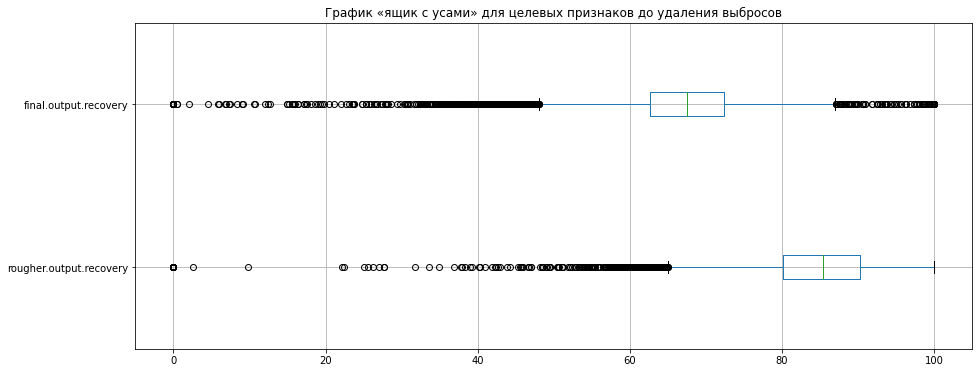

In [16]:
# Проверим есть ли выбросы целевого признака и удалим если есть до машинного обучения
plt.figure(figsize=(15, 6))
plt.title('График «ящик с усами» для целевых признаков до удаления выбросов')
data_train.boxplot(['rougher.output.recovery', 'final.output.recovery'], vert=False, figsize=(12,6))
plt.show()

Вывод:boxplot показывает большой разброс значений целевого признака. Удалим значения со значаниями равные нулю, так как с большой верятностью это выбросы.

Размер date_train до удаления выбросов: (14041, 55)
Размер date_train после удаления выбросов: (13690, 55)


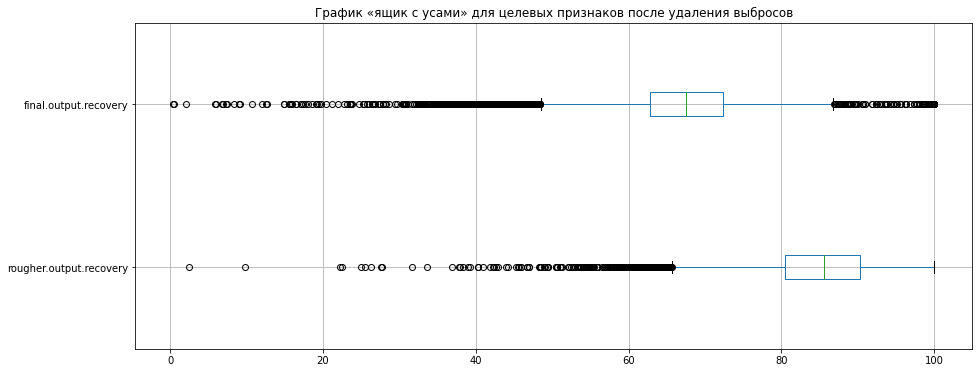

In [17]:
# удалим выбросы(значения равные нулю) в тренировочной выборке
# 1 - для процесса rougher
print('Размер date_train до удаления выбросов:', data_train.shape)
data_train = data_train[
    (data_train['rougher.output.recovery'] != 0)]

# 2 - для процесса final
data_train = data_train[
    (data_train['final.output.recovery'] != 0)]

print('Размер date_train после удаления выбросов:', data_train.shape)

# Проверим правильно ли произошло удаление выбросов
plt.figure(figsize=(15, 6))
plt.title('График «ящик с усами» для целевых признаков после удаления выбросов')
data_train.boxplot(['rougher.output.recovery', 'final.output.recovery'], vert=False, figsize=(12,6))
plt.show()

Вывод: удалили выбросы и подготовили выборки для машинного обучения на моделях регрессии

### Выделение целевого признака

In [18]:
# создадим target и features выборки сначала для тренировочной выборки
# Так как нужно спрогнозировать сразу две величины, выборки выделим соответственно
# для процессов Rougher и Final

target_train_rougher = data_train['rougher.output.recovery']
features_train_rougher = data_train[data_train.columns[
    data_train.columns.str.contains('rougher') #возьмем столбцы для всех кроме rougher
    ]].drop('rougher.output.recovery', axis=1) # удалим целевой признак
            
target_train_final = data_train['final.output.recovery']
features_train_final = data_train[data_train.columns[
    ~data_train.columns.str.contains('rougher') #возьмем столбцы для всех кроме rougher
    ]].drop('final.output.recovery', axis=1 # удалим целевой признак
            ).drop('date', axis=1) # удилим дату, так как она не несет информации для прогноза 

# выполним те же операции для тестовой выборки
# целевой признак тестовой выборки возьмем из исходных данных

target_test_rougher = data_full[
    data_full['date'].isin(data_test['date']
                          )]['rougher.output.recovery'
                            ]
features_test_rougher = data_test[data_test.columns[
    data_test.columns.str.contains('rougher')] #возьмем столбцы для rougher
    ]

target_test_final = data_full[
    data_full['date'].isin(data_test['date']
                          )]['final.output.recovery'
                            ]
features_test_final = data_test[data_test.columns[
    ~data_test.columns.str.contains('rougher')] #возьмем столбцы для final
    ].drop('date', axis=1) 


### Обучение разных моделей и оценка их качества кросс-валидацией

#### Линейная регрессия

In [19]:
# отмасштабируем признаки, так как будем применять линейную регрессию
scaler_rougher = StandardScaler()
scaler_rougher.fit(features_train_rougher)
features_train_rougher_scaled = scaler_rougher.transform(features_train_rougher)
#features_valid_rougher_scaled = scaler_rougher.transform(features_valid_rougher)
features_test_rougher_scaled = scaler_rougher.transform(features_test_rougher)

scaler_final = StandardScaler()
scaler_final.fit(features_train_final)
features_train_final_scaled = scaler_final.transform(features_train_final)
#features_valid_final_scaled = scaler_final.transform(features_valid_final)
features_test_final_scaled = scaler_final.transform(features_test_final)

In [155]:
# построим модель LinearRegression для rougher и оценим с помощью sMAPE
model_rougher = LinearRegression()
scorer = make_scorer(smape)
scores = cross_val_score(model_rougher,
                         features_train_rougher_scaled, 
                         target_train_rougher, 
                         cv=5,
                         scoring = scorer
                        )
smape_rougher = scores.mean()
print('sMAPE_rougher:', smape_rougher)

# построим модель LinearRegression для final и оценим с помощью sMAPE
model_final = LinearRegression()
#scorer = make_scorer(smape)
scores = cross_val_score(model_final,
                         features_train_final_scaled, 
                         target_train_final, 
                         cv=5,
                         scoring = scorer
                        )

smape_final = scores.mean()
print('sMAPE_final', smape_final)
smape_total = 0.25 * smape_rougher + 0.75 * smape_final
print('Итоговой sMAPE модели LinearRegression =', smape_total)

sMAPE_rougher: 6.7297694669898025
sMAPE_final 9.907894886556804
Итоговой sMAPE модели LinearRegression = 9.113363531665053


#### RandomForestRegressor

In [163]:
%%time
# найдем оптимальную модель для Rougher сначала перебрав глубину
scorer = make_scorer(smape)
smape_rougher = 100
best_depth = 0
model = None
for depth in range(25, 35):
    model = RandomForestRegressor(n_estimators=20, max_depth=depth, random_state=12345)
    scores = cross_val_score(model,
                         features_train_rougher_scaled, 
                         target_train_rougher, 
                         cv=5,
                         scoring = scorer
                        )
    score = scores.mean()
    #model.fit(features_train_rougher_scaled, target_train_rougher)
    #result = model.score(features_valid_rougher_scaled, target_valid_rougher)
    if abs(score) < smape_rougher:
        smape_rougher = score
        best_depth = depth
        model_rougher_RF = model
print('Наименьший sMAPE модели RandomForestRegressor для Rougher = ', smape_rougher, 'при max_depth = ', best_depth)


Наименьший sMAPE модели RandomForestRegressor для Rougher =  6.625679369272348 при max_depth =  28
CPU times: user 2min 55s, sys: 332 ms, total: 2min 55s
Wall time: 2min 55s


In [171]:
%%time
# улучшим модель для Rougher увеличив количество деревьев до 500
scorer = make_scorer(smape)
smape_rougher = 100
best_depth = 0
model = None
for depth in range(28, 29):
    model = RandomForestRegressor(n_estimators=500, max_depth=depth, random_state=12345)
    scores = cross_val_score(model,
                         features_train_rougher_scaled, 
                         target_train_rougher, 
                         cv=5,
                         scoring = scorer
                        )
    score = scores.mean()
    #model.fit(features_train_rougher_scaled, target_train_rougher)
    #result = model.score(features_valid_rougher_scaled, target_valid_rougher)
    if abs(score) < smape_rougher:
        smape_rougher = score
        best_depth = depth
        model_rougher_RF = model
print('Наименьший sMAPE модели RandomForestRegressor для Rougher = ', smape_rougher, 'при max_depth = ', best_depth)


Наименьший sMAPE модели RandomForestRegressor для Rougher =  6.548984265129285 при max_depth =  28
CPU times: user 7min 19s, sys: 2.15 s, total: 7min 21s
Wall time: 7min 22s


In [165]:
%%time
# найдем оптимальную модель для Final сначала перебрав глубину
scorer = make_scorer(smape)
smape_final = 100
best_depth = 0
model = None
for depth in range(15, 25):
    model = RandomForestRegressor(n_estimators=20, max_depth=depth, random_state=12345)
    scores = cross_val_score(model,
                         features_train_final_scaled, 
                         target_train_final, 
                         cv=5,
                         scoring = scorer
                        )
    score = scores.mean()
    if abs(score) < smape_final:
        smape_final = score 
        best_depth = depth
        model_final_RF = model
print('Наименьший sMAPE модели RandomForestRegressor для Final = ', smape_final, 'при max_depth = ', best_depth)

Наименьший sMAPE модели RandomForestRegressor для Final =  12.400959227546581 при max_depth =  16
CPU times: user 3min 57s, sys: 348 ms, total: 3min 58s
Wall time: 3min 58s


In [180]:
%%time
# улучшим модель для Final путем подбора samples_leaf, samples_split и features
scorer = make_scorer(smape)
smape_final = 100
best_depth = 0
model = None
for samples_leaf in range(2, 7):
    for samples_split in range(2, 5):
        for features in range(1, 4):
            model = RandomForestRegressor(n_estimators=20, max_depth=16, random_state=12345,
                                 max_features = features,
                                 min_samples_leaf = samples_leaf,
                                 min_samples_split = samples_split
                                 )
            scores = cross_val_score(model,
                         features_train_final_scaled, 
                         target_train_final, 
                         cv=5,
                         scoring = scorer
                        )
            score = scores.mean()
            if abs(score) < smape_final:
                smape_final = score
                best_features = features
                best_samples_leaf = samples_leaf
                best_samples_split = samples_split
                model_final_RF = model
print('Наименьший sMAPE модели RandomForestRegressor для Final = ', smape_final, 
      'при best_features = ', best_features,
      'при best_samples_leaf = ', best_samples_leaf,
      'при best_samples_split = ', best_samples_split)

Наименьший sMAPE модели RandomForestRegressor для Final =  9.929453577948205 при best_features =  1 при best_samples_leaf =  5 при best_samples_split =  2
CPU times: user 1min 15s, sys: 172 ms, total: 1min 15s
Wall time: 1min 15s


In [181]:
# Расчет итогового sMAPE
smape_total = 0.25 * smape_rougher + 0.75 * smape_final
print('Итоговый sMAPE модели RandomForestRegressor =', smape_total)

Итоговый sMAPE модели RandomForestRegressor = 9.084336249743476


Вывод: 

модель RandomForestRegressor показала результаты лучше, чем LinearRegression. Итоговый sMAPE модели RandomForestRegressor равен 9.08 и он ниже, чем для модели LinearRegression со значением этой метрики 9.11.

### Проверка лучшей модели на тестовой выборке

In [20]:
# Расчет sMAPE модели RandomForestRegressor  для Rougher на тестовой выборке
model_rougher = RandomForestRegressor(n_estimators=500, 
                                      max_depth=28, 
                                      random_state=12345,
                                     )
model_rougher.fit(features_train_rougher_scaled, target_train_rougher)
predictions_rougher = model_rougher.predict(features_test_rougher)
smape_rougher = smape(target_test_rougher.reset_index(drop=True), predictions_rougher)

# Расчет sMAPE модели RandomForestRegressor для Final на тестовой выборке
model_final = RandomForestRegressor(n_estimators=20, 
                                    max_depth=16, 
                                    random_state=12345,
                                    max_features = 1,
                                    min_samples_leaf = 5,
                                    min_samples_split = 2)
model_final.fit(features_train_final_scaled, target_train_final)
predictions_final = model_final.predict(features_test_final)
smape_final = smape(target_test_final.reset_index(drop=True), predictions_final)

# Расчет итогового sMAPE
smape_total = 0.25 * smape_rougher + 0.75 * smape_final
print('Итоговый sMAPE модели RandomForestRegressor на тестовой выборке =', smape_total)

Итоговый sMAPE модели RandomForestRegressor на тестовой выборке = 9.738971419657021


### Проверим модель на адекватность

In [ ]:
# Расчет sMAPE модели DummyRegressor для Rougher на тестовой выборке
model = DummyRegressor()
model.fit(features_train_rougher_scaled, target_train_rougher)
predictions = model.predict(features_test_rougher)
smape_rougher = smape(target_test_rougher.reset_index(drop=True), predictions)

# Расчет sMAPE модели DummyRegressor для Final на тестовой выборке
model = DummyRegressor()
model.fit(features_train_final_scaled, target_train_final)
predictions = model_final.predict(features_test_final)
smape_final = smape(target_test_final.reset_index(drop=True), predictions)

In [3]:
# Расчет итогового sMAPE
smape_total = 0.25 * smape_rougher + 0.75 * smape_final
print('Итоговый sMAPE модели DummyRegressor на тестовой выборке =', smape_total)

Итоговый sMAPE модели DummyRegressor на тестовой выборке = 139.0


Вывод: Для адекватности наша модель должна иметь значение sMAPE менее, чем 139 для DummyRegressor.

## Вывод: 


При подготовке данных были иучены, проверены и проанализированы данные. <br>
<br>
Анализ данных показал: <br>
1) концентрация золота(Au) растет на всех этапах очистки. Концентрация серебра(Ag) растет при флотации и падает при очистке. Конуентрация Pb растет при флотации и остается неизменной при очистке <br>
2) распределение гранул сырья для тренировочной и тестовой выборки примерно одинаковое. Несмотря на то, что больше выбросов и их размах на тренировочной выборке, значения в перделах диаргаммы размаха идентичны <br>
3) суммарная концентрация всех веществ уменьшается после флотации и увеличивается после очистки.<br>
<br>
Были обучены две модели: LinearRegression и RandomForestRegressor. <br>
Вторая модель показала лучшие результаты на валидационной выборке <br>
Проверка лучшей модели показали хороший результат итогового sMAPE = 9.7, что значительно ниже, чем этот показатель качества модели для константной модели.